In [313]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import os

In [314]:
def read_file(file_name):
    grouped_data = defaultdict(list)
    grouped_data_testing = defaultdict(list)
    with open(file_name, 'r') as file:
        lines = file.readlines()

        epoch = np.nan
        precision = np.nan
        recall = np.nan
        f_score = np.nan
        accuracy = np.nan
        g_mean = np.nan
        training_time = np.nan
        inference_time = np.nan
        model = ''
        model_time = ''

        training_loss = defaultdict(list)

        testing = False

        for line in lines:
            info = ''

            try:
                info = line.split(' - ')[1]
            except:
                continue

            if 'Model: ' in info:
                model = info.split('Model: ')[1].split(' ')[0]
                model_time = info.split('Model: ')[1].split(' ')[1]

            if 'train loss' in info:
                training_loss[int(re.findall(r'\d+', info)[0])].append(float(re.findall(r'\d+\.\d+', info)[0]))

            if 'Evaluation Results' in info:
                if '(completely new data)' in info:
                    testing = True
                    model = info.split(' ')[0]
                epoch = int(re.findall(r'\d+', info.split(' with ')[1])[0])

            if 'Precision' in info:
                precision = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Recall' in info:
                recall = float(re.findall(r'\d+\.\d+', info)[0])
                
            if 'F-score' in info:
                f_score = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Accuracy' in info:
                accuracy = float(re.findall(r'\d+\.\d+', info)[0])

            if 'G-mean' in info:
                g_mean = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Training time' in info:
                training_time = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Inference time' in info:
                inference_time = float(re.findall(r'\d+\.\d+', info)[0])

            
            if not np.isnan(epoch) and not np.isnan(precision) and not np.isnan(recall) and not np.isnan(f_score) and not np.isnan(accuracy):
                if testing:
                    grouped_data_testing[epoch].append({
                        'model': model,
                        'epoch': epoch,
                        'testing': testing,
                        'precision': precision,
                        'recall': recall,
                        'f_score': f_score,
                        'accuracy': accuracy,
                        'g_mean': g_mean,
                        'training_loss': training_loss,
                        'training_time': training_time,
                        'inference_time': inference_time,
                        'model_time': model_time,
                        'balanced': True,
                        'distribution': {
                            'crime': 160,
                            'health': 160,
                            'politics': 160,
                            'science': 160,
                            'social_media': 160,
                        },
                        'split': {
                            'testing': 100,
                        }
                    })
                else:
                    grouped_data[epoch].append({
                        'model': model,
                        'epoch': epoch,
                        'testing': testing,
                        'precision': precision,
                        'recall': recall,
                        'f_score': f_score,
                        'accuracy': accuracy,
                        'g_mean': g_mean,
                        'training_loss': training_loss,
                        'training_time': training_time,
                        'inference_time': inference_time,
                        'model_time': model_time,
                        'balanced': True,
                        'distribution':{
                            'crime': 850,
                            'health': 850,
                            'politics': 850,
                            'science': 850,
                            'social_media': 850,
                        },
                        'split': {
                            'training': 80,
                            'validation': 20,
                        }
                    })
                epoch = np.nan
                precision = np.nan
                recall = np.nan
                f_score = np.nan
                accuracy = np.nan
                g_mean = np.nan
                training_loss = defaultdict(list)
                training_time = np.nan
                inference_time = np.nan
                testing = False
                model_time = ''
        

    return grouped_data, grouped_data_testing

In [315]:
# Initialize defaultdict to group data points per epoch
grouped_data = defaultdict(list)
grouped_data_testing = defaultdict(list)

log_files = [f for f in os.listdir('./logs') if f.endswith('.log')]

for log_file in log_files:
    file_data, file_new_data = read_file('./logs/' + log_file)

    for epoch, data in file_data.items():
        grouped_data[epoch].extend(data)

    for epoch, data in file_new_data.items():
        grouped_data_testing[epoch].extend(data)
    
    print(log_file, len(file_data))

training_log_2023-12-13_11-45-22.log 1
training_log_2023-12-13_12-45-00.log 7
training_log_2023-12-13_13-02-08.log 4
training_log_2023-12-13_15-17-23.log 4
training_log_2023-12-13_17-42-26.log 4
training_log_2023-12-13_23-13-14.log 2
training_log_2023-12-14_02-11-13.log 4
training_log_2023-12-14_10-10-30.log 1
training_log_2023-12-14_11-38-43.log 1
training_log_2023-12-14_18-56-42.log 6
training_log_2023-12-14_23-00-44.log 7
training_log_2023-12-15_13-39-57.log 6
training_log_2023-12-16_12-25-22.log 3
training_log_2023-12-16_23-41-22.log 3
training_log_2023-12-17_10-17-19.log 2
training_log_2023-12-17_14-09-00.log 0
training_log_2023-12-17_14-23-10.log 8
training_log_2023-12-17_17-03-31.log 2
training_log_2023-12-20_01-26-13.log 2
training_log_2023-12-20_09-48-59.log 1
training_log_2023-12-22_05-55-55.log 0


In [316]:
# grouped_data, _ = read_file('./logs/training_log_2023-12-14_18-56-42.log')

In [317]:
# sort the grouped data by epoch
sorted_grouped_data = sorted(grouped_data.items(), key=lambda x: x[0])
# convert back into map
grouped_data = dict(sorted_grouped_data)

In [318]:
unique_epochs = np.array(list(grouped_data.keys()))
unique_epochs = np.array(unique_epochs)[~np.isnan(unique_epochs)]
print('Unique Epochs: ', unique_epochs)

Unique Epochs:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [319]:
# remove results after epoch 8
# grouped_data = {k: v for k, v in grouped_data.items() if k <= 10}
unique_epochs = np.array(list(grouped_data.keys()))

In [320]:
# get a count of the number of data points per epoch for each metric
precision_count = []
recall_count = []
f_score_count = []
accuracy_count = []
g_mean_count = []

for epoch in unique_epochs:
    precision_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['precision'])]) + len([x for x in grouped_data_testing[epoch] if not np.isnan(x['precision'])]))
    recall_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['recall'])]) + len([x for x in grouped_data_testing[epoch] if not np.isnan(x['recall'])]))
    f_score_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['f_score'])]) + len([x for x in grouped_data_testing[epoch] if not np.isnan(x['f_score'])]))
    accuracy_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['accuracy'])]) + len([x for x in grouped_data_testing[epoch] if not np.isnan(x['accuracy'])]))
    g_mean_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['g_mean'])]) + len([x for x in grouped_data_testing[epoch] if not np.isnan(x['g_mean'])]))


print('Precision Count: ', dict(zip(unique_epochs, precision_count)))
print('Recall Count: ', dict(zip(unique_epochs, recall_count)))
print('F-score Count: ', dict(zip(unique_epochs, f_score_count)))
print('Accuracy Count: ', dict(zip(unique_epochs, accuracy_count)))
print('G-mean Count: ', dict(zip(unique_epochs, g_mean_count)))

Precision Count:  {1: 18, 2: 14, 3: 14, 4: 60, 5: 44, 6: 62, 7: 84, 8: 58, 9: 26, 10: 34, 11: 20, 12: 10, 13: 12, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4}
Recall Count:  {1: 18, 2: 14, 3: 14, 4: 60, 5: 44, 6: 62, 7: 84, 8: 58, 9: 26, 10: 34, 11: 20, 12: 10, 13: 12, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4}
F-score Count:  {1: 18, 2: 14, 3: 14, 4: 60, 5: 44, 6: 62, 7: 84, 8: 58, 9: 26, 10: 34, 11: 20, 12: 10, 13: 12, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4}
Accuracy Count:  {1: 18, 2: 14, 3: 14, 4: 60, 5: 44, 6: 62, 7: 84, 8: 58, 9: 26, 10: 34, 11: 20, 12: 10, 13: 12, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4}
G-mean Count:  {1: 14, 2: 14, 3: 14, 4: 56, 5: 42, 6: 60, 7: 81, 8: 57, 9: 25, 10: 34, 11: 20, 12: 10, 13: 10, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4}


In [321]:
# Calculate the average per epoch for each metric
avg_precision = []
avg_recall = []
avg_f_score = []
avg_accuracy = []
avg_g_mean = []

# ignore nan values
for epoch in unique_epochs:
    avg_precision.append(np.nanmean([x['precision'] for x in grouped_data[epoch]]))
    avg_recall.append(np.nanmean([x['recall'] for x in grouped_data[epoch]]))
    avg_f_score.append(np.nanmean([x['f_score'] for x in grouped_data[epoch]]))
    avg_accuracy.append(np.nanmean([x['accuracy'] for x in grouped_data[epoch]]))
    avg_g_mean.append(np.nanmean([x['g_mean'] for x in grouped_data[epoch]]))


print('Average Precision: ', avg_precision)
print('Average Recall: ', avg_recall)
print('Average F-score: ', avg_f_score)
print('Average Accuracy: ', avg_accuracy)
print('Average G-mean: ', avg_g_mean)


Average Precision:  [0.9552159193098875, 0.9638717021848571, 0.9656748743475297, 0.9658883651950002, 0.9655723106117228, 0.9671214717963974, 0.9671750214999632, 0.9653397735028122, 0.9670621712721984, 0.9669372292953051, 0.9653723608847681, 0.9674632801354723, 0.9621338744414532, 0.9663047461935543, 0.9656972067145373, 0.9651584862343012, 0.9674808505365079, 0.969357747237749, 0.9673331672379607, 0.9709392223521423]
Average Recall:  [0.955169658482266, 0.9628294121421543, 0.9648526096499422, 0.965035224056185, 0.9650678233892562, 0.9665180261743082, 0.9667840794681285, 0.9647289571423011, 0.9664042451636626, 0.9666656564093022, 0.965091805570073, 0.9668737625664905, 0.961394767784964, 0.9659485462061359, 0.9654283212547173, 0.9648447675876846, 0.9669838050208395, 0.9688383929993849, 0.9672683748263924, 0.9704931049574268]
Average F-score:  [0.9550955300132665, 0.9631717628965732, 0.9651698778155814, 0.9653262257390496, 0.9651875472222836, 0.9666364162043309, 0.9668489211221176, 0.96484

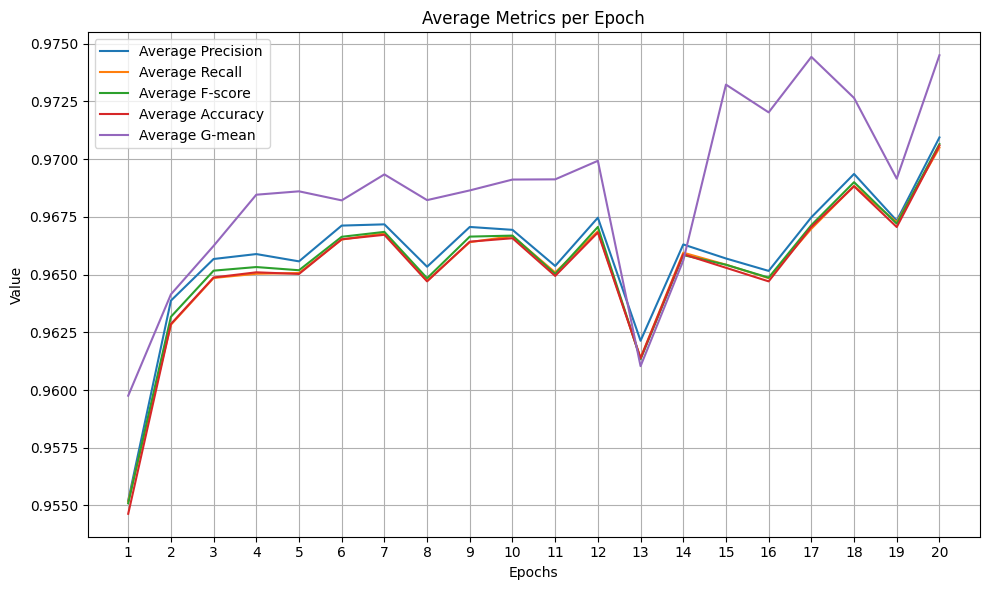

In [322]:
# Plotting
plt.figure(figsize=(10, 6))

# remove nan
avg_precision = np.array(avg_precision)[~np.isnan(avg_precision)]
avg_recall = np.array(avg_recall)[~np.isnan(avg_recall)]
avg_f_score = np.array(avg_f_score)[~np.isnan(avg_f_score)]
avg_accuracy = np.array(avg_accuracy)[~np.isnan(avg_accuracy)]
avg_g_mean = np.array(avg_g_mean)[~np.isnan(avg_g_mean)]


plt.plot(unique_epochs, avg_precision, label='Average Precision')
plt.plot(unique_epochs, avg_recall, label='Average Recall')
plt.plot(unique_epochs, avg_f_score, label='Average F-score')
plt.plot(unique_epochs, avg_accuracy, label='Average Accuracy')
plt.plot(unique_epochs, avg_g_mean, label='Average G-mean')

plt.title('Average Metrics per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [323]:
# get the best per epoch
best_precision = []
best_recall = []
best_f_score = []
best_accuracy = []
best_g_mean = []
best_model = []

for epoch in unique_epochs:
    best_precision.append(np.nanmax([x['precision'] for x in grouped_data[epoch]]))
    best_recall.append(np.nanmax([x['recall'] for x in grouped_data[epoch]]))
    best_f_score.append(np.nanmax([x['f_score'] for x in grouped_data[epoch]]))
    best_accuracy.append(np.nanmax([x['accuracy'] for x in grouped_data[epoch]]))
    best_g_mean.append(np.nanmax([x['g_mean'] for x in grouped_data[epoch]]))
    best_model.append([x['model'] for x in grouped_data[epoch] if x['precision'] == np.nanmax([x['precision'] for x in grouped_data[epoch]])][0])

print('Best Precision: ', best_precision)
print('Best Recall: ', best_recall)
print('Best F-score: ', best_f_score)
print('Best Accuracy: ', best_accuracy)
print('Best G-mean: ', best_g_mean)

Best Precision:  [0.9602974350544542, 0.9683594237348014, 0.96888588405306, 0.9731108129782597, 0.9751751460763088, 0.9715982341364496, 0.9726434940865557, 0.9734283006749648, 0.9719997418059105, 0.9742741526631686, 0.9720868302390041, 0.9722869535706167, 0.9724573410898261, 0.9664600873456202, 0.9674010988515789, 0.9671939018002844, 0.9675979830009644, 0.9698215771771247, 0.9674242577381058, 0.9746787533632881]
Best Recall:  [0.9603927169744638, 0.9686239935939025, 0.9680539795310545, 0.9732536833561138, 0.9758043852519217, 0.9725376914747079, 0.9739356031552168, 0.9729595502940562, 0.9720765755396723, 0.973867277225789, 0.9719833035585754, 0.9718900315774786, 0.9718267028618641, 0.9661103379909806, 0.9671404057175508, 0.967238868786781, 0.9671113369038101, 0.9695644501821297, 0.9674254127489746, 0.9741522842572129]
Best F-score:  [0.9603100298817034, 0.9684667487303991, 0.9683998413595726, 0.9731254282684452, 0.9754259315744687, 0.9718225560921556, 0.9730787812399362, 0.9730923991458

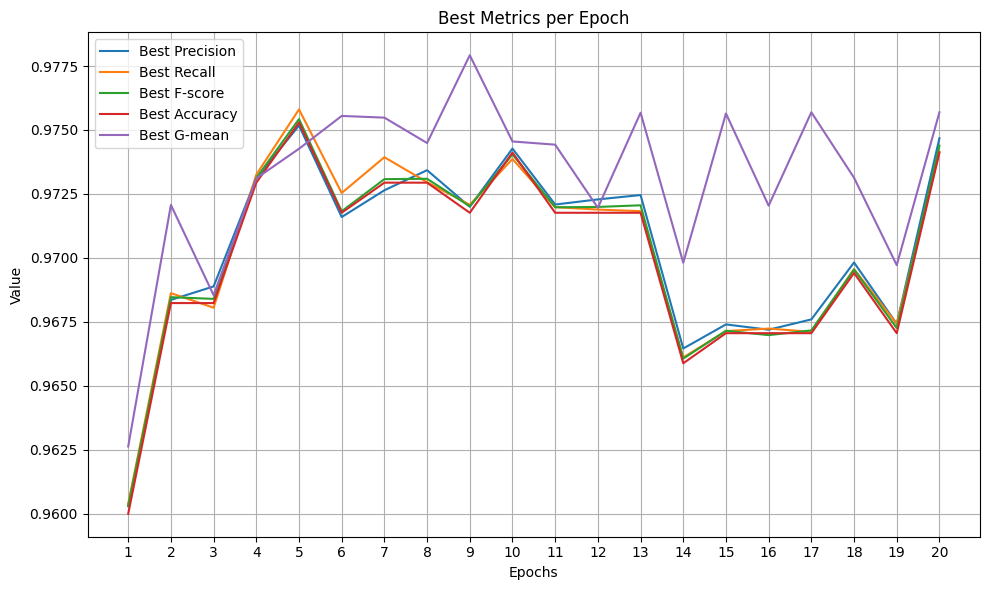

In [324]:
# Plotting
plt.figure(figsize=(10, 6))

# remove nan
best_precision = np.array(best_precision)[~np.isnan(best_precision)]
best_recall = np.array(best_recall)[~np.isnan(best_recall)]
best_f_score = np.array(best_f_score)[~np.isnan(best_f_score)]
best_accuracy = np.array(best_accuracy)[~np.isnan(best_accuracy)]
best_g_mean = np.array(best_g_mean)[~np.isnan(best_g_mean)]

plt.plot(unique_epochs, best_precision, label='Best Precision')
plt.plot(unique_epochs, best_recall, label='Best Recall')
plt.plot(unique_epochs, best_f_score, label='Best F-score')
plt.plot(unique_epochs, best_accuracy, label='Best Accuracy')
plt.plot(unique_epochs, best_g_mean, label='Best G-mean')

plt.title('Best Metrics per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [325]:
# Compare the average metrics for the new data
avg_precision_testing = []
avg_recall_testing = []
avg_f_score_testing = []
avg_accuracy_testing = []
avg_g_mean_testing = []

# ignore nan values

for epoch in unique_epochs:
    avg_precision_testing.append(np.nanmean([x['precision'] for x in grouped_data_testing[epoch]]))
    avg_recall_testing.append(np.nanmean([x['recall'] for x in grouped_data_testing[epoch]]))
    avg_f_score_testing.append(np.nanmean([x['f_score'] for x in grouped_data_testing[epoch]]))
    avg_accuracy_testing.append(np.nanmean([x['accuracy'] for x in grouped_data_testing[epoch]]))
    avg_g_mean_testing.append(np.nanmean([x['g_mean'] for x in grouped_data_testing[epoch]]))


print('Average Precision (Testing dataset): ', avg_precision_testing)
print('Average Recall (Testing dataset): ', avg_recall_testing)
print('Average F-score (Testing dataset): ', avg_f_score_testing)
print('Average Accuracy (Testing dataset): ', avg_accuracy_testing)
print('Average G-mean (Testing dataset): ', avg_g_mean_testing)

Average Precision (Testing dataset):  [0.960243742998636, 0.965612282973234, 0.9680601944279729, 0.9688822643258087, 0.968314488809357, 0.9682791028609316, 0.9691470785628088, 0.966742702068179, 0.9684941718615853, 0.9693465249212648, 0.9681037463617665, 0.9686025269882708, 0.9647587104880865, 0.9653123583821039, 0.9733993297636723, 0.9732423169258703, 0.9720138053862536, 0.9702445546837748, 0.9720823378369526, 0.9669744279197228]
Average Recall (Testing dataset):  [0.9609459791212398, 0.9658153186434715, 0.9682721834044976, 0.968813018514035, 0.968695102211861, 0.9685695357701001, 0.9697411921898231, 0.9673602331416633, 0.9690490407993138, 0.9702325257258897, 0.9690342448615981, 0.9690984804531604, 0.9650176835692598, 0.9663278917970072, 0.9741244023727663, 0.9742043422955533, 0.9729739877637664, 0.9711374041879, 0.9730557581079304, 0.9677559640311019]
Average F-score (Testing dataset):  [0.9604512327261716, 0.9655533137350453, 0.9680098557173457, 0.9686725174856164, 0.968368903825809

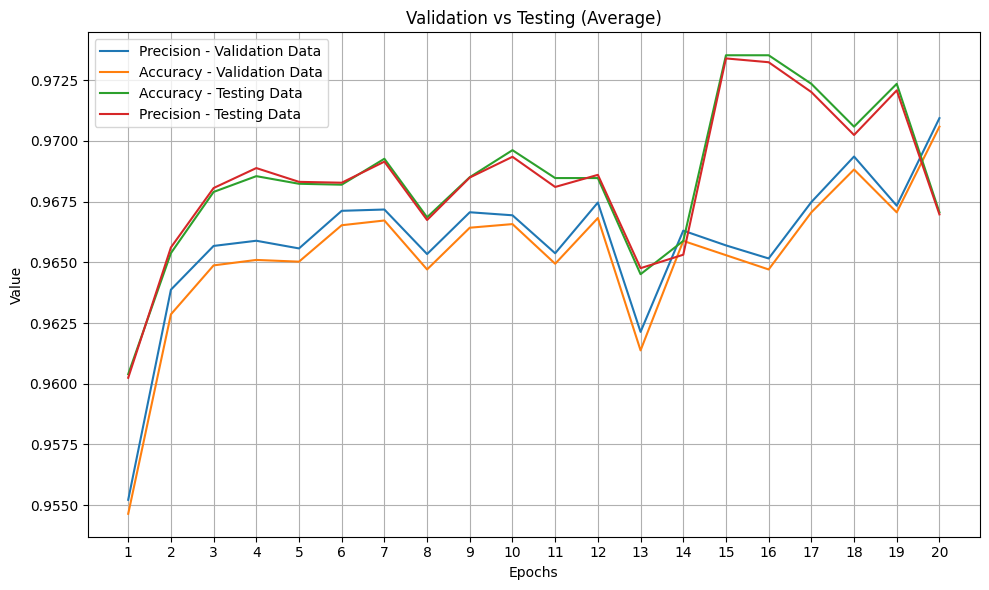

In [326]:
# Plotting new data vs old data
plt.figure(figsize=(10, 6))

# remove nan
avg_precision_testing = np.array(avg_precision_testing)[~np.isnan(avg_precision_testing)]
avg_recall_testing = np.array(avg_recall_testing)[~np.isnan(avg_recall_testing)]
avg_f_score_testing = np.array(avg_f_score_testing)[~np.isnan(avg_f_score_testing)]
avg_accuracy_testing = np.array(avg_accuracy_testing)[~np.isnan(avg_accuracy_testing)]
avg_g_mean_testing = np.array(avg_g_mean_testing)[~np.isnan(avg_g_mean_testing)]

plt.plot(unique_epochs, avg_precision, label='Precision - Validation Data')
plt.plot(unique_epochs, avg_accuracy, label='Accuracy - Validation Data')

plt.plot(unique_epochs, avg_accuracy_testing, label='Accuracy - Testing Data')
plt.plot(unique_epochs, avg_precision_testing, label='Precision - Testing Data')

plt.title('Validation vs Testing (Average)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [327]:
# best metrics for new data
best_precision_testing = []
best_recall_testing = []
best_f_score_testing = []
best_accuracy_testing = []
best_g_mean_testing = []
best_model_testing = []

for epoch in unique_epochs:
    best_precision_testing.append(np.nanmax([x['precision'] for x in grouped_data_testing[epoch]]))
    best_recall_testing.append(np.nanmax([x['recall'] for x in grouped_data_testing[epoch]]))
    best_f_score_testing.append(np.nanmax([x['f_score'] for x in grouped_data_testing[epoch]]))
    best_accuracy_testing.append(np.nanmax([x['accuracy'] for x in grouped_data_testing[epoch]]))
    best_g_mean_testing.append(np.nanmax([x['g_mean'] for x in grouped_data_testing[epoch]]))
    best_model_testing.append([x['model'] for x in grouped_data_testing[epoch] if x['g_mean'] == np.nanmax([x['g_mean'] for x in grouped_data_testing[epoch]])][0])

print('Best Precision (Testing dataset): ', best_precision_testing)
print('Best Recall (Testing dataset): ', best_recall_testing)
print('Best F-score (Testing dataset): ', best_f_score_testing)
print('Best Accuracy (Testing dataset): ', best_accuracy_testing)
print('Best G-mean (Testing dataset): ', best_g_mean_testing)

Best Precision (Testing dataset):  [0.965462966787048, 0.9717498782527685, 0.9725802440106597, 0.9746528327834859, 0.9751751460763088, 0.9740233135206878, 0.9759307131848116, 0.9738311681438232, 0.9772955353797768, 0.9740401868922449, 0.9713085000610325, 0.9715482165319959, 0.9750434945045287, 0.9700730578570417, 0.9750271658393279, 0.9748489580252995, 0.9726318252129875, 0.9724233553306062, 0.9751851911440579, 0.9728800868374317]
Best Recall (Testing dataset):  [0.9655796339261353, 0.9723758996898633, 0.9732237400906314, 0.9744155996020464, 0.9758043852519217, 0.9747990697027005, 0.9756716622808177, 0.9748632728700567, 0.9781941698146268, 0.9749856136648942, 0.9719676774118602, 0.9721542213740539, 0.9760551323814717, 0.9710265650299951, 0.9759969947539904, 0.9760902667350873, 0.9733812152390845, 0.9733230776116034, 0.9760902667350873, 0.9736653478187666]
Best F-score (Testing dataset):  [0.965239225215738, 0.9719723266396464, 0.9728558608214162, 0.9744279663124373, 0.9754259315744687,

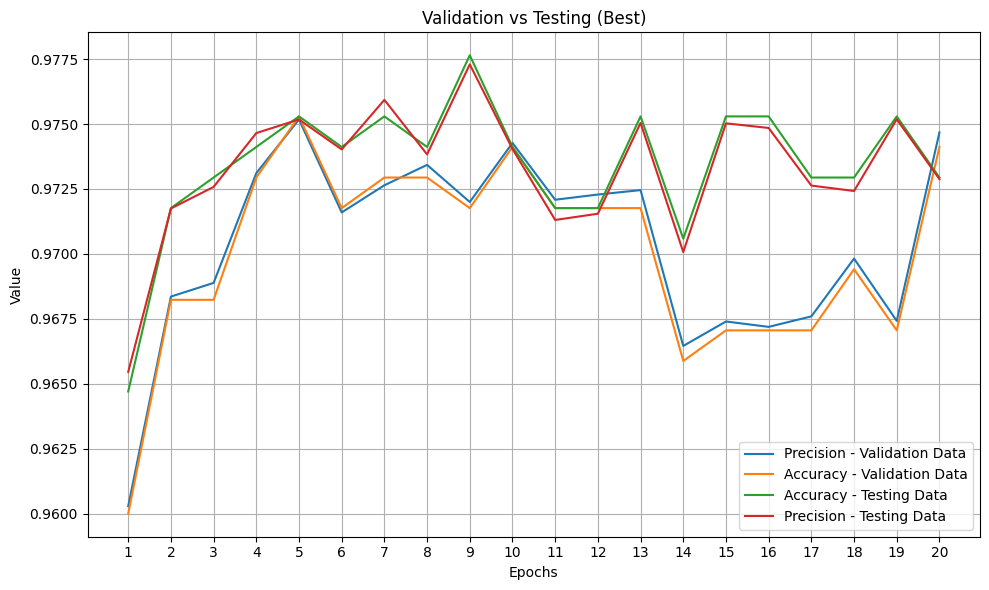

In [328]:
# Plotting new data vs old data
plt.figure(figsize=(10, 6))

# remove nan
best_precision_testing = np.array(best_precision_testing)[~np.isnan(best_precision_testing)]
best_recall_testing = np.array(best_recall_testing)[~np.isnan(best_recall_testing)]
best_f_score_testing = np.array(best_f_score_testing)[~np.isnan(best_f_score_testing)]
best_accuracy_testing = np.array(best_accuracy_testing)[~np.isnan(best_accuracy_testing)]
best_g_mean_testing = np.array(best_g_mean_testing)[~np.isnan(best_g_mean_testing)]

plt.plot(unique_epochs, best_precision, label='Precision - Validation Data')
plt.plot(unique_epochs, best_accuracy, label='Accuracy - Validation Data')

plt.plot(unique_epochs, best_accuracy_testing, label='Accuracy - Testing Data')
plt.plot(unique_epochs, best_precision_testing, label='Precision - Testing Data')

plt.title('Validation vs Testing (Best)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [329]:
# graph the training loss
average_training_loss = []
average_training_time = []
average_inference_time = []

for epoch in unique_epochs:
  epoch_loss = [np.nanmean(x['training_loss'][epoch]) for x in grouped_data[epoch] if epoch in x['training_loss']]
  if epoch_loss:
    average_training_loss.append(np.nanmean(epoch_loss))
  else:
    average_training_loss.append(np.nan)
  average_training_time.append(np.nanmean([x['training_time'] for x in grouped_data[epoch]]))
  average_inference_time.append(np.nanmean([x['inference_time'] for x in grouped_data[epoch]]))

print('Average Training Loss: ', average_training_loss)
print('Average Training Time: ', average_training_time)
print('Average Inference Time: ', average_inference_time)


Average Training Loss:  [5.89542134e-01 1.10554206e-01 5.65665998e-02 3.07737099e-02
 1.87985165e-02 1.18681166e-02 8.42388327e-03 6.96150447e-03
 5.59755237e-03 4.85916074e-03 5.88963409e-03 3.07907239e-03
 5.56266667e-03 1.18455000e-02 1.98750000e-03 2.25050000e-03
 4.56300000e-03 1.18000000e-03 1.12500000e-04 5.39850000e-03]
Average Training Time:  [ 469.80872279  501.45863966  686.25874124  818.74161888 1036.93895082
 1365.94289209 1588.76402142 1810.34782267 2112.5804145  2414.1642069
 2583.15856643 2753.1321003  2314.31627385 1138.14578855 1234.26627576
 1317.93442774 1373.74784529 1956.86527371 1488.24406695 1572.33584976]
Average Inference Time:  [26.5218358  26.79600433 25.32356868 22.21905835 23.14057377 25.50917304
 23.35702865 25.18435505 26.20492926 26.53845563 25.4616164  25.78180671
 19.15763621  6.85499084  6.63911426  6.87644911  6.93624091  7.79752111
  6.44661629  6.56244373]


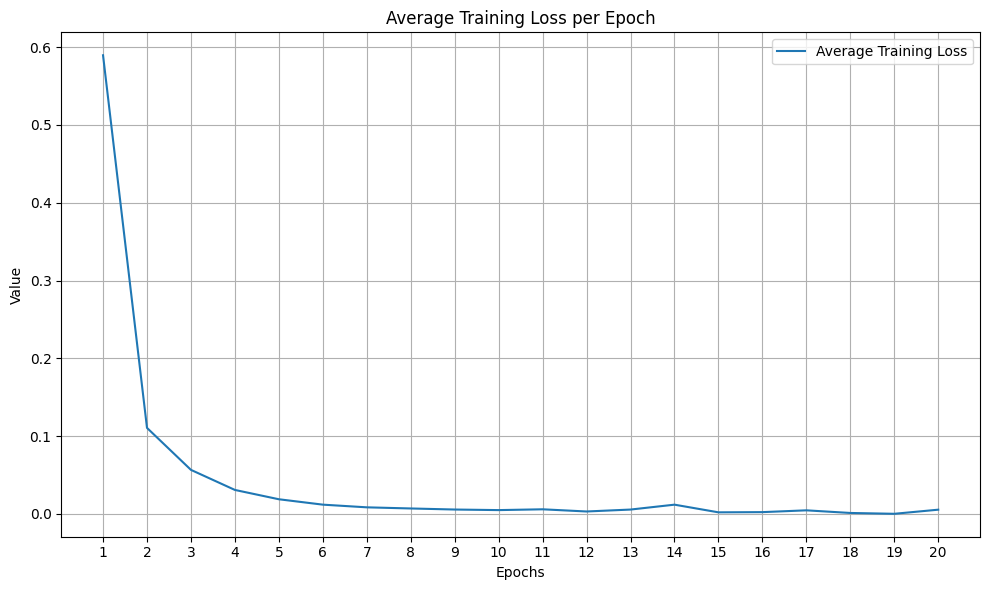

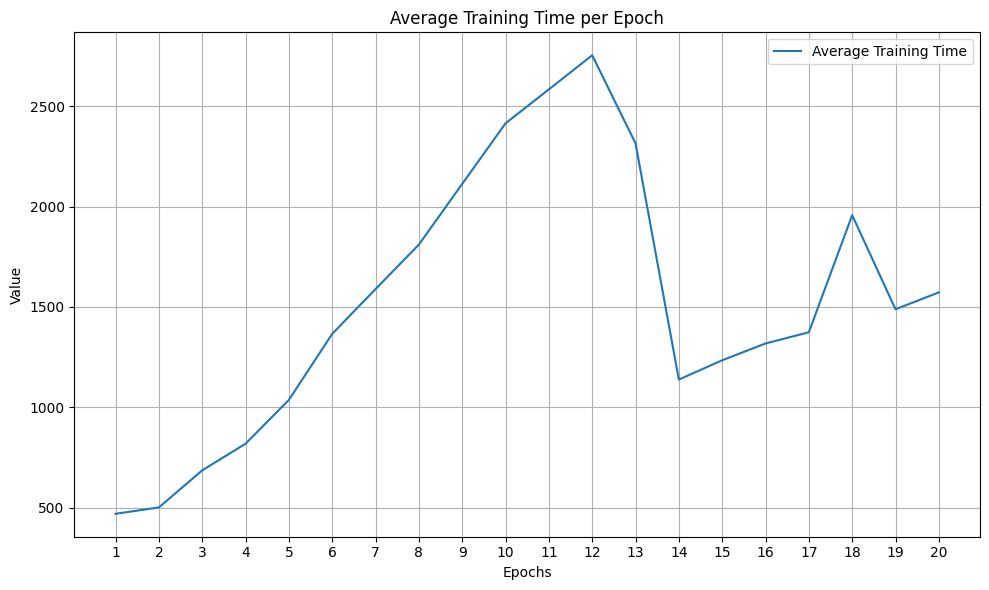

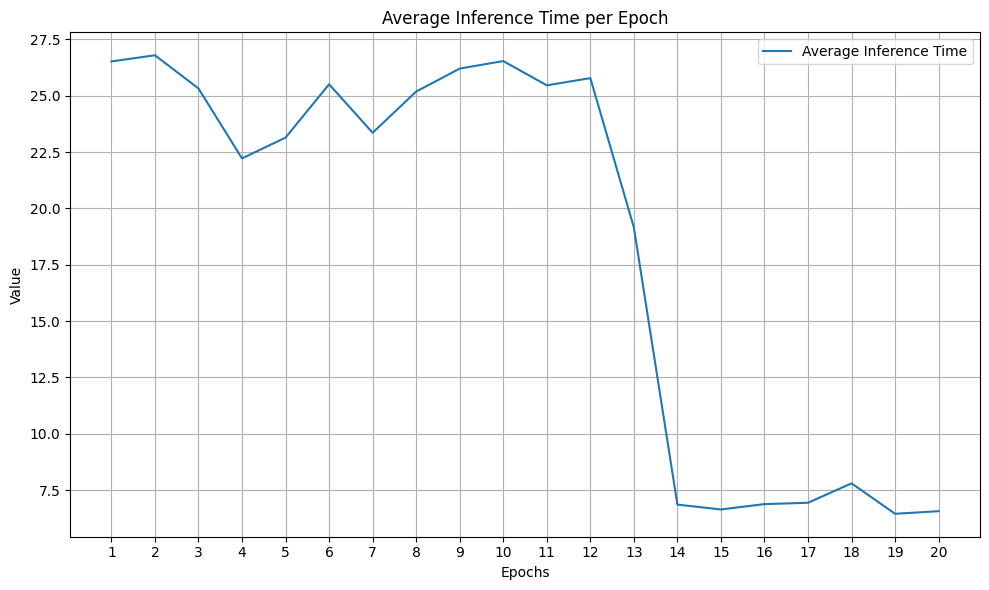

In [330]:
# make 3 charts, one for training loss, one for training time, one for inference time
plt.figure(figsize=(10, 6))

# remove nan
average_training_loss = np.array(average_training_loss)[~np.isnan(average_training_loss)]
average_training_time = np.array(average_training_time)[~np.isnan(average_training_time)]
average_inference_time = np.array(average_inference_time)[~np.isnan(average_inference_time)]

plt.plot(unique_epochs, average_training_loss, label='Average Training Loss')
plt.title('Average Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(unique_epochs, average_training_time, label='Average Training Time')
plt.title('Average Training Time per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(unique_epochs, average_inference_time, label='Average Inference Time')
plt.title('Average Inference Time per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [331]:
import pandas as pd

# create a dataframe for each metric
precision_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': precision_count, 'Average Precision (Validation)': avg_precision, 'Best Precision (Validation)': best_precision, 'Average Precision (Testing)': avg_precision_testing, 'Best Precision (Testing)': best_precision_testing})
recall_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': recall_count, 'Average Recall (Validation)': avg_recall, 'Best Recall (Validation)': best_recall, 'Average Recall (Testing)': avg_recall_testing, 'Best Recall (Testing)': best_recall_testing})
f_score_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': f_score_count, 'Average F-score (Validation)': avg_f_score, 'Best F-score (Validation)': best_f_score, 'Average F-score (Testing)': avg_f_score_testing, 'Best F-score (Testing)': best_f_score_testing})
accuracy_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': accuracy_count, 'Average Accuracy (Validation)': avg_accuracy, 'Best Accuracy (Validation)': best_accuracy, 'Average Accuracy (Testing)': avg_accuracy_testing, 'Best Accuracy (Testing)': best_accuracy_testing})
g_mean_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': g_mean_count, 'Average G-mean (Validation)': avg_g_mean, 'Best G-mean (Validation)': best_g_mean, 'Average G-mean (Testing)': avg_g_mean_testing, 'Best G-mean (Testing)': best_g_mean_testing})
training_loss_df = pd.DataFrame({'Epoch': unique_epochs, 'Average Training Loss': average_training_loss})


# create a dataframe for all the data
all_data = []
for epoch in unique_epochs:
    for data in grouped_data[epoch]:
        # convert the training loss to a list if it isn't already
        if not isinstance(data['training_loss'], list):
            data['training_loss'] = [x[0] for _, x in data['training_loss'].items()]
        all_data.append(data)
    for data in grouped_data_testing[epoch]:
        # add the epoch to the data
        data['epoch'] = epoch
        # convert the training loss to a list if it isn't already
        if not isinstance(data['training_loss'], list):
            data['training_loss'] = [x[0] for _, x in data['training_loss'].items()]
        all_data.append(data)
    

all_data_df = pd.DataFrame(all_data)

In [332]:
# export the data to excel
import xlsxwriter

epoch_rows = len(unique_epochs) + 1

def training_loss_chart():
    chart = workbook.add_chart({'type': 'line'})
    chart.add_series({
        'name': f'Average Training Loss',
        'categories': f'=Training Loss!$A$2:$A${epoch_rows}',
        'values': f'=Training Loss!$B$2:B${epoch_rows}',
        'line': {
            'color': 'blue', 
            'width': 1.5
        },
    })

    chart.set_title({'name': 'Average Training Loss'})
    chart.set_x_axis({'name': 'Epochs'})
    chart.set_y_axis({'name': 'Value'})
    chart.set_style(10)
    chart.set_size({'width': 900, 'height': 600})
    worksheet = writer.sheets['Training Loss']
    worksheet.insert_chart(f'B{epoch_rows + 3}', chart)


def add_chart(sheet_name, show_best=True, show_testing=True):
    chart = workbook.add_chart({'type': 'line'})
    chart.add_series({
        'name': f'Average {sheet_name} (Validation)',
        'categories': f'={sheet_name}!$A$2:$A${epoch_rows}',
        'values': f'={sheet_name}!$C$2:C${epoch_rows}',
        'line': {
            'color': 'blue', 
            'width': 1.5
        },
    })
    if show_best:
        chart.add_series({
            'name': f'Best {sheet_name} (Validation)',
            'categories': f'={sheet_name}!$A$2:$A${epoch_rows}',
            'values': f'={sheet_name}!$D$2:$D${epoch_rows}',
            'line': {
                'color': 'red', 
                'width': 1.5
            }
        })
    if show_testing:
        chart.add_series({
            'name': f'Average {sheet_name} (Testing)',
            'categories': f'={sheet_name}!$A$2:$A${epoch_rows}',
            'values': f'={sheet_name}!$E$2:$E${epoch_rows}',
            'line': {
                'color': 'green', 
                'width': 1.5
            }
        })
        if show_best:
            chart.add_series({
                'name': f'Best {sheet_name} (Testing)',
                'categories': f'={sheet_name}!$A$2:$A${epoch_rows}',
                'values': f'={sheet_name}!$F$2:$F${epoch_rows}',
                'line': {
                    'color': 'orange', 
                    'width': 1.5
                }
            })
    chart.set_title({'name': sheet_name})
    chart.set_x_axis({'name': 'Epochs'})
    chart.set_y_axis({'name': 'Value'})
    chart.set_style(10)
    chart.set_size({'width': 900, 'height': 600})
    worksheet = writer.sheets[sheet_name]
    worksheet.insert_chart(f'B{epoch_rows + 3}', chart)

def set_column_widths(sheet_name):
    worksheet = writer.sheets[sheet_name]
    worksheet.set_column('B:B', 20)
    worksheet.set_column('C:C', 30)
    worksheet.set_column('D:D', 30)
    worksheet.set_column('E:E', 25)
    worksheet.set_column('F:F', 25)
    


def set_all_data_widths():
    # set the columns for the all data sheet
    worksheet = writer.sheets['All Data']
    worksheet.set_column('A:A', 25)
    worksheet.set_column('B:B', 10)
    worksheet.set_column('C:C', 10)
    worksheet.set_column('D:D', 12)
    worksheet.set_column('E:E', 12)
    worksheet.set_column('F:F', 12)
    worksheet.set_column('G:G', 12)
    worksheet.set_column('H:H', 12)
    worksheet.set_column('I:I', 40)
    worksheet.set_column('J:J', 15)
    worksheet.set_column('K:K', 15)
    worksheet.set_column('L:L', 20)
    worksheet.set_column('M:M', 65)
    worksheet.set_column('N:N', 25)

def all_metrics_chart(type = 'Average', cell='A1'):
    rows = f'$D$2:$D${epoch_rows}' if type == 'Best' else f'$C$2:$C${epoch_rows}'
    # create a chart for the the average of all metrics in a new sheet
    chart = workbook.add_chart({'type': 'line'})
    chart.add_series({
        'name': f'{type} Precision',
        'categories': f'=Precision!$A$2:$A${rows}',
        'values': f'=Precision!{rows}',
        'line': {
            'color': 'blue', 
            'width': 1.5
        },

    })
    chart.add_series({
        'name': f'{type} Recall',
        'categories': f'=Recall!$A$2:$A${rows}',
        'values': f'=Recall!{rows}',
        'line': {
            'color': 'red', 
            'width': 1.5
        }
    })
    chart.add_series({
        'name': f'{type} F-score',
        'categories': f'=F-score!$A$2:$A${rows}',
        'values': f'=F-score!{rows}',
        'line': {
            'color': 'green', 
            'width': 1.5
        }
    })
    chart.add_series({
        'name': f'{type} Accuracy',
        'categories': f'=Accuracy!$A$2:$A${rows}',
        'values': f'=Accuracy!{rows}',
        'line': {
            'color': 'orange', 
            'width': 1.5
        }
    })
    chart.add_series({
        'name': f'{type} G-mean',
        'categories': f'=G-mean!$A$2:$A${rows}',
        'values': f'=G-mean!{rows}',
        'line': {
            'color': 'purple', 
            'width': 1.5
        }
    })

    chart.set_title({'name': f'{type} Metrics'})
    chart.set_x_axis({'name': 'Epochs'})
    chart.set_y_axis({'name': 'Value'})
    chart.set_style(10)
    chart.set_size({'width': 900, 'height': 600})
    # create a new sheet for the chart
    worksheet = writer.sheets['All Metrics']
    worksheet.insert_chart(cell, chart)



# export to excel
with pd.ExcelWriter('classification_results.xlsx', engine='xlsxwriter') as writer:
    precision_df.to_excel(writer, index=False, sheet_name='Precision')
    recall_df.to_excel(writer, index=False, sheet_name='Recall')
    f_score_df.to_excel(writer, index=False, sheet_name='F-score')
    accuracy_df.to_excel(writer, index=False, sheet_name='Accuracy')
    g_mean_df.to_excel(writer, index=False, sheet_name='G-mean')
    training_loss_df.to_excel(writer, index=False, sheet_name='Training Loss')
    all_data_df.to_excel(writer, index=False, sheet_name='All Data')

    # create a workbook
    workbook = writer.book

    # create a chart for the average and best of each metric in each sheet
    add_chart('Precision')
    add_chart('Recall')
    add_chart('F-score')
    add_chart('Accuracy')
    add_chart('G-mean')
    add_chart('Training Loss', show_best=False, show_testing=False)

    # set the column width for each sheet
    set_column_widths('Precision')
    set_column_widths('Recall')
    set_column_widths('F-score')
    set_column_widths('Accuracy')
    set_column_widths('G-mean')
    set_column_widths('Training Loss')

    # create a chart for the training loss
    training_loss_chart()

    # set the column width for the all data sheet
    set_all_data_widths()

    # create a chart for the the average of all metrics in a new sheet
    workbook.add_worksheet('All Metrics')
    all_metrics_chart(type='Average', cell='B2')
    all_metrics_chart(type='Best', cell='B33')


